In [1]:
#importing all necessary packages
library(tidyverse) # import our dataset
library(ggplot2) # to plot the graph 
library(GGally) # to plot the pairplot
library(psych) # to plot the correlation plot
library(ggpubr)
library(reshape)
library(datasets)
library(caret)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [2]:
df <- read.csv('diabetes.csv')

In [3]:
df$Outcome<- factor(df$Outcome, 
                  levels = c(0, 1), 
                  labels = c("Positive", "Negative"))

In [4]:
out <- subset(df, select = c(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age))

Using  as id variables



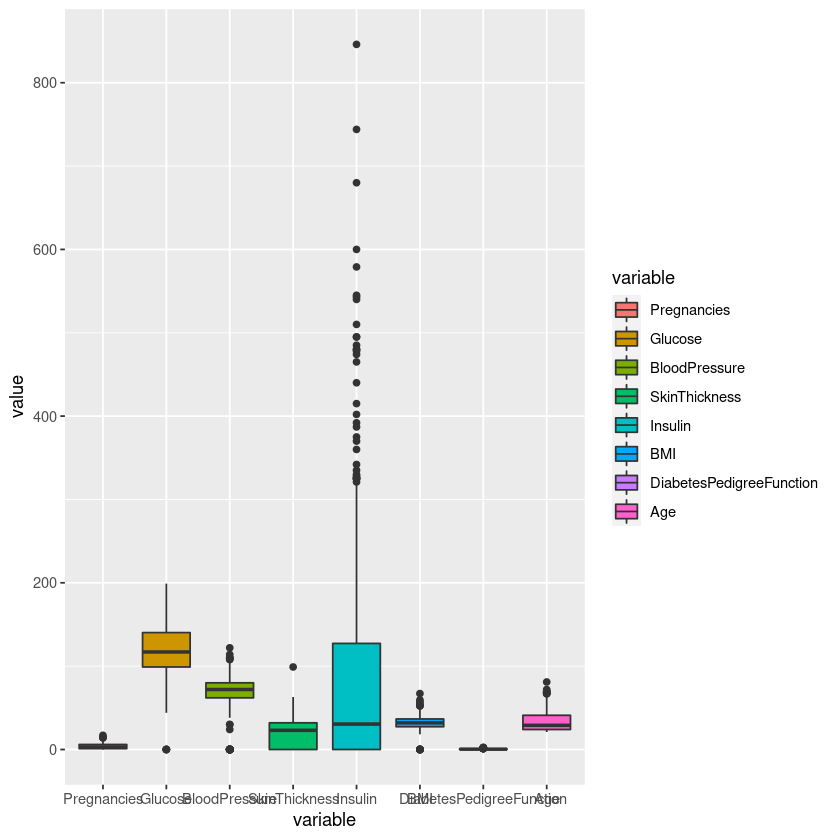

In [5]:
ggplot(data = melt(out), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))

In [8]:
limits <- createDataPartition(df$Outcome, p=0.90, list=FALSE)
# select 20% of the data for validation
testdf <- df[-limits,]
# use the remaining 80% of data to training and testing the models
traindf <- df[limits,]

In [9]:
traindf[1 : 8] <- as.data.frame(scale(traindf[1 : 8]))

In [10]:
traindf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.65067995,0.83996245,0.13200027,0.8980928,-0.71116330,0.18294994,0.47404874,1.41129527,Negative
2,-0.85022180,-1.12036961,-0.18297969,0.5241201,-0.71116330,-0.70878835,-0.38086384,-0.19790690,Positive
3,1.25104064,1.92903581,-0.28797300,-1.2834143,-0.71116330,-1.12917925,0.61343666,-0.11321205,Negative
4,-0.85022180,-0.99590408,-0.18297969,0.1501475,0.14980358,-0.51770157,-0.95080555,-1.04485541,Positive
5,-1.15040215,0.49768225,-1.54789283,0.8980928,0.82758601,1.39316619,5.61901173,-0.02851720,Negative
6,0.35049960,-0.15576177,0.23699359,-1.2834143,-0.71116330,-0.83617953,-0.84549024,-0.28260175,Positive
7,-0.24986110,-1.33818429,-1.02292624,0.7111064,0.09484824,-0.14826714,-0.69990730,-0.62138115,Negative
8,1.85140134,-0.18687815,-3.64775921,-1.2834143,-0.71116330,0.39951495,-1.05302336,-0.36729660,Positive
9,-0.55004145,2.36466516,0.02700695,1.5213805,4.26229429,-0.21196273,-0.97868314,1.66537983,Negative


In [ ]:
install.packages('')

In [ ]:
wintraindf[1 : 8] <- as.data.frame(wi(traindf[1 : 8]))

In [7]:
Q <- quantile(traindf$Outcome, probs=c(.25, .75), na.rm = FALSE)

ERROR: Error in quantile.default(traindf$Outcome, probs = c(0.25, 0.75), na.rm = FALSE): factors are not allowed


In [ ]:
iqr <- IQR(traindf$Outcome)
up <-  Q[2]+1.5*iqr # Upper bound  
low<- Q[1]-1.5*iqr # Lower bound

In [ ]:
normal <- subset(traindf, traindf$Outcome > (Q[1] - 1.5*iqr) & traindf$Outcome < (Q[2]+1.5*iqr))
normal

In [ ]:
boxes <- subset(normal, select = c(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age))
ggplot(data = melt(boxes), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))